# Tarea 6
## Ejercicio 1

Utilice la teoría anterior para modelar y explicar correctamente los resultados obtenidos en su simulación del ejercicio 1 de la sesión 1.

Bajo que condiciones es posible recuperar las caracteristicas del modelo analítico en la simulación?

In [19]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
#variables fijas
b=1
sigma_b = 0.01
sigma_f = .000158
sigma_e = .0045
n = 80
k = 4
P = np.arange(50,201)

In [3]:
# Calcular los valores empíricos
eigenPromedio = np.zeros ((len(P),5))
eigencuantile = np.zeros ((len(P),2))

for p in P :
    
    R_acum = np.zeros((100,5))
    
    
    # Repetir 100 veces para el mismo valor de p
    for r in range (100) :
        mu =  b*np.ones(k)
        cov =  sigma_b * np.identity(k)
        L = np.random.multivariate_normal(mu, cov, p) 
        
        mu = np.zeros(k)
        cov = sigma_f * np.identity(k)
        F = np.random.multivariate_normal(mu, cov, n)
        
        mu = np.zeros(n)
        cov = sigma_e * np.identity(n)
        epsilon = np.random.multivariate_normal(mu, cov, p)
        
        R=L@np.transpose(F) + epsilon
        Sigma = 1 / n * ( R @ np.transpose(R) )
        
        eival, eivec = np.linalg.eig(Sigma)
        R_acum[r,] = np.real(eival[:5,])
        
    
    # Repetir para todas las p's obteniendo la media
    eigenPromedio[p-50,] = R_acum.mean(axis=0)
    eigencuantile[p-50,] = np.quantile(R_acum[:,0], (.25,.75))


In [4]:
#Calculo de valores teoricos
lambda1 = ( sigma_f*P*(b**2 *k + sigma_b) + sigma_e )  * (1 + sigma_e/ (n*sigma_f*(sigma_b+k*b**2) ) )

cota = (1/n)*(sigma_e/(sigma_f*sigma_b))**2
if (p>=cota):
    lambda2 = (sigma_f*sigma_b*P + sigma_e)*(1 + sigma_e/(n*sigma_f*sigma_b))
else:
    lambda2 = sigma_e * (1+np.sqrt(P/n))**2

lambda3 = sigma_e * ((1+np.sqrt(P/n))**2)

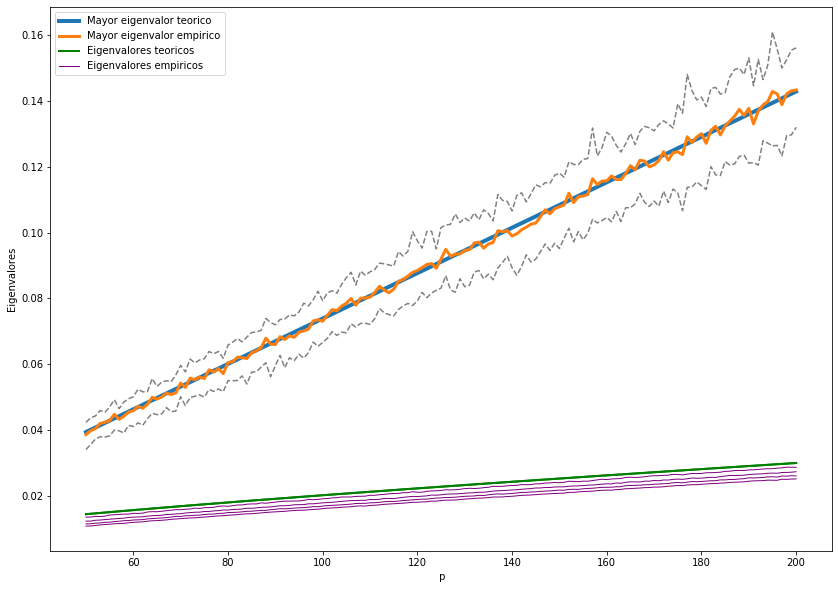

In [6]:
# plotear   
plt.figure(figsize=(14, 10))
plt.plot(P, lambda1, linewidth=4, label="Mayor eigenvalor teorico")
plt.plot(P, eigenPromedio[:,0], linewidth=3, label="Mayor eigenvalor empirico")
plt.plot (P, eigencuantile[:,0], "--", color="gray")
plt.plot (P, eigencuantile[:,1], "--", color="gray")
plt.plot(P, lambda2, linewidth=2, color="green", label= "Eigenvalores teoricos")
plt.plot(P, lambda3, linewidth=2, color="green")
plt.plot(P, eigenPromedio[:,1], linewidth=1, label= "Eigenvalores empiricos", color="purple")
plt.plot(P, eigenPromedio[:,2], linewidth=1, color="purple")
plt.plot(P, eigenPromedio[:,3], linewidth=1, color="purple")
plt.plot(P, eigenPromedio[:,4], linewidth=1, color="purple")
ax = plt.gca()
ax.set(xlabel=" p",
       ylabel="Eigenvalores")    
ax.legend();


Podemos observar en el gráfico anterior que ahora nuestro valor analítico se acerca mucho más a nuestro valor empírico, mejorando la aproximación.
Esto se cumple para cuando n y p, son del mismo orden; cabe mencionar que si fueran de dimensión muy diferente esto podría hacer que no se separaran las lineas del analítico y el empírico.

## Ejercicio 2

### a) Revise el ejemplo 6.1.7 de la pag. 170 en Rencher (2002). En este problema se econtró que $\theta_{obs} = 0.652$. Aplicando la metodología estudiada en esta sesión encuentre $\theta^{TW}_{.05}$ y rechace o acepte la hipótesis nula. Discuta los resultados e implicaciones en el contexto del ejemplo estudiado (20 pts).

In [8]:
#para los datos del ejercicio
m = 48 - 6
n = 6 -1
p = 4

sen2_ga2 = (p -1/2) / (m+n-1)
gamma = 2*np.arcsin(np.sqrt(sen2_ga2))

sen2_phi2 = (n -1/2) / (m+n-1)
phi = 2*np.arcsin(np.sqrt(sen2_phi2))

mu = 2*np.log(np.tan( (gamma + phi )/2))
sigma3 = (16 /(m+n-1)**2)* (1/ ( (np.sin(phi+gamma)**2)*np.sin(phi)*np.sin(gamma)))
sigma = sigma3 ** (1/3)

f1_95 = .9793
theta_alpha = np.exp( mu + f1_95 *sigma)/ (1+ np.exp(mu + f1_95*sigma))
theta_alpha

0.3838582441850831

Dado que el estadístico es menor que el propuesto en el libro, no rechazamos la $H_0 : \mu_1=...=\mu_6$, pero si comparamos con lo que ellos comparan según tablas del valor crítico, si rechazaríamos $H_0$ pues propone valores menores a .37

## Ejercicio 3


In [18]:
#declarar variables
N = 200
T = 150

c = N/T
alpha = (1-c)/c
#primer caso p=.3
p=np.array([.3,.5,.7])

nmat = 5000
eig_p3 = np.empty(0)
eig_p5 = np.empty(0)
eig_p7 = np.empty(0)

for i in range(nmat):
    
    # ensemble GOE
    M = np.random.normal(0, 1,(N,N))
    M = (M + np.transpose(M) ) / 2
    
    #ensemble wishart
    W = np.random.normal(0, 1,(N,T))
    W = W @ np.transpose(W)
    
    #suma y eigenvalores 
    H1 = p[0]*M/np.sqrt(N) + (1-p[0])*W/N
    e1, v1 = np.linalg.eig(H1)
    eig_p3  = np.concatenate((eig_p3, e1), axis=None)
    
    H2 = p[1]*M/np.sqrt(N) + (1-p[1])*W/N
    e2, v2 = np.linalg.eig(H2)
    eig_p5  = np.concatenate((eig_p5, e2), axis=None)
    
    H3 = p[2]*M/np.sqrt(N) + (1-p[2])*W/N
    e3, v3 = np.linalg.eig(H3)
    eig_p7  = np.concatenate((eig_p7, e3), axis=None)




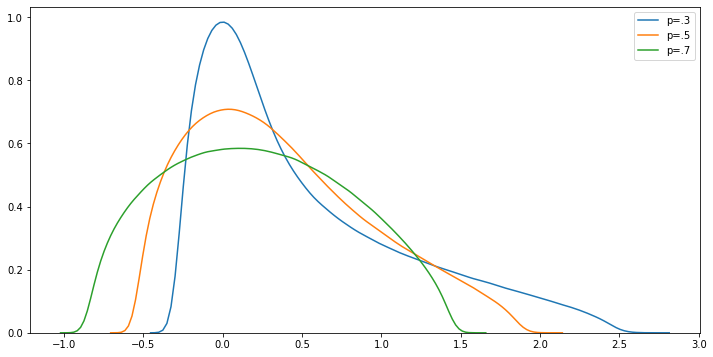

In [15]:
#grafica
plt.figure(figsize=(12, 6))      
sns.distplot(eig_p3, rug=False, hist=False, label = "p=.3")
sns.distplot(eig_p5, rug=False, hist=False, label = "p=.5")
sns.distplot(eig_p7, rug=False, hist=False, label = "p=.7")

In [11]:
# Parte 2 del ejercicio
from sympy.solvers import solve
from sympy import symbols
from math import pi
#declaramos variables
G,z,a,w  = symbols('G z a w')

In [14]:
#y = w**2 * G/2 +((1-w)*(1-a))/(1-(1-w)*G) -z + 1/G
#y1 = y.subs(a,alpha).subs(w,p[0])
#sol_1 = solve(y1, G)

#sol = solve ( [w**2 * G/2 +(1-w)*(1+a)/(1-(1-w)*G)  + 1/G-z],[G])
sol = solve ( w**2 * G/2 +((1-w)*(1+a))/(1-(1-w)*G) -z + 1/G, G)


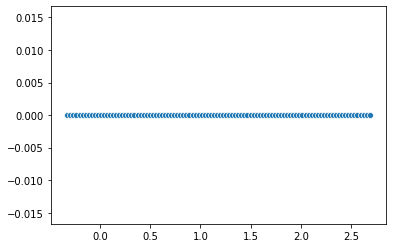

In [17]:
#para p = 0.3
npts = 100
x = np.linspace(np.min(eig_p3),np.max(eig_p3),npts)

sol1 = sol[0].subs(a,alpha).subs(w,p[0])
sol2 = sol[1].subs(a,alpha).subs(w,p[0])
sol3 = sol[2].subs(a,alpha).subs(w,p[0])

G_p3 = np.empty(0)
for i in range(npts):
    tmp1 = sol1.subs(z,x[i])
    tmp2 = sol2.subs(z,x[i])
    tmp3 = sol3.subs(z,x[i])
    if ( np.imag(tmp1)==0):
        G_p3 = np.concatenate((G_p3, abs(np.imag(tmp3))/pi), axis=None)
    else: 
        G_p3 = np.concatenate((G_p3, abs(np.imag(tmp1))/pi), axis=None)

#print("After Substitution : {}".format(sol_1[0].subs(z,x[i]))) 
sns.scatterplot(x,G_p3)

# no me rescata la parte imaginaria :/